In [1]:
# tabular data stuff
import pandas as pd
import numpy as np

# viz libraries
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error, r2_score

from pydataset import data

import env
import wrangle

In [ ]:
# 1. Select a dataset with a continuous target variable.

In [9]:
tips = sns.load_dataset('tips')
data('tips', show_doc = True)
tips.head()

tips

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Tipping data

### Description

One waiter recorded information about each tip he received over a period of a
few months working in one restaurant. He collected several variables:

### Usage

    data(tips)

### Format

A data frame with 244 rows and 7 variables

### Details

  * tip in dollars, 

  * bill in dollars, 

  * sex of the bill payer, 

  * whether there were smokers in the party, 

  * day of the week, 

  * time of day, 

  * size of the party. 

In all he recorded 244 tips. The data was reported in a collection of case
studies for business statistics (Bryant & Smith 1995).

### References

Bryant, P. G. and Smith, M (1995) _Practical Data Analysis: Case Studies in
Business Statistics_. Homewood, IL: Richard D. Irwin Publishing:




,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [10]:
tips.info()
# No null values found

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [ ]:
# 2. Be sure your data is prepared (no missing values, numeric datatypes) and split into samples.

In [11]:
# split data
train_validate, test = train_test_split(tips, test_size=.2, random_state=123)
train, validate = train_test_split(train_validate, 
                                        test_size=.3, 
                                        random_state=123)
train.shape, validate.shape, test.shape

((136, 7), (59, 7), (49, 7))

In [ ]:
# 3. Work through all of the steps outlined in the lesson, from setting the baseline to selected a model and evaluating the final model on your test data.

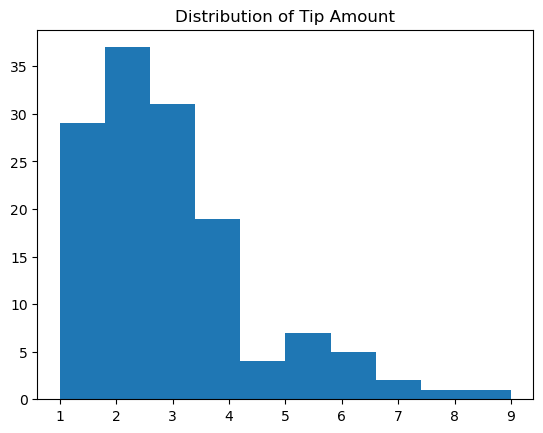

In [12]:
    # a. plot the target variable ('tip')
        # NOTE: This is not normally distributed

plt.hist(train['tip'])
plt.title('Distribution of Tip Amount')
plt.show()

In [ ]:
# If we see a good model, we will see a distribution of predictions
# that should line up with our data,
# but OLS as a vanilla algorithm may not be our best fit here
# as it does presume normality in the distrbution of its target

In [ ]:
# QUESTION: What to do with categorical variables "'sex', 'smoker', 'day' 'time"
# ANS: Remove them

In [39]:
    # b. Establish baseline

# split up our X and y:
X = train.drop(columns=['sex', 'smoker', 'day', 'time', 'tip'])     # Remove 'tip' (target variable) from X
y = train['tip']

In [40]:
# see which measurement (mean or mode) to select as the baseline
y.mean()

2.946985294117647

In [41]:
y.mode()

0    2.0
Name: tip, dtype: float64

In [42]:
# We choose the mean as our baseline because it is the best measure of central tendency.
# It includes all values in the data set for its calculation, and any change will affect the value of the mean.
# Mode is the least used of the measures of central tendency and can only be applied to nominal 
# (qualitative data used to name or label variables without providing numeric values data. 

baseline = y.mean()

In [43]:
    # c. Evaluate

# function returns root mean squared root (RMSE) and explained variance (r2) for two series  -- the actual value (y) 
# and the predicted value (yhat)

In [44]:
def evaluate_reg(y, yhat):
    '''
    based on two series, y_act, y_pred, (y, yhat), we
    evaluate and return the root mean squared error
    as well as the explained variance for the data.
    
    returns: rmse (float), rmse (float)
    '''
    rmse = mean_squared_error(y, yhat, squared=False)
    r2 = r2_score(y, yhat)
    return rmse, r2

In [45]:
y.shape

(136,)

In [46]:
# DON'T KNOW WHAT THIS IS DOING

# make sure that we have a baseline guess
# that is the same shape as our y variable:
# np.repeat does what it sounds like
baseline_array = np.repeat(baseline, y.shape[0])

In [47]:
baseline_rmse, baseline_r2 = evaluate_reg(y, baseline_array)

In [48]:
    # d. Create a dataframe to compare the models

In [49]:
eval_df = pd.DataFrame([{
    'model': 'baseline',
    'rmse': baseline_rmse,
    'r2': baseline_r2
}])

In [50]:
eval_df

,model,rmse,r2
0,baseline,1.451246,0.0


In [51]:
# OLS (Ordinary Least Squares) is our standard linear regression algorithm and is computed by minimizing the sum of squared differences 
# in the linear model (residual) with the actual data points

In [52]:
from sklearn.linear_model import LinearRegression

In [53]:
    # e. Find the best feature

In [57]:
# initial ML model
lr1 = LinearRegression()     # lr1 is my next model I'm testing

# rfe has entered the chat:
rfe = RFE(lr1, n_features_to_select=1)     # I'm using recursive feature elimination (RFE) to construct it

# fit
rfe.fit(X, y)     # Here I'm fitting the model onto my X and y (from baseline)

# transform
X_train_rfe = rfe.transform(X)     # WHAT AM I DOING HERE

X_val_rfe = rfe.transform(validate.drop(columns=['sex', 'smoker', 'day', 'time','tip']))     # WHAT AM I DOING HERE
                                                                                             # Remove 'tip' (target variable) from X

In [58]:
y.head()

18     3.50
172    5.15
118    1.80
28     4.30
237    1.17
Name: tip, dtype: float64

In [61]:
X_train_rfe[:5]

array([[3.],
       [2.],
       [2.],
       [2.],
       [2.]])

In [62]:
# which features did it select?
rfe.get_feature_names_out()

array(['size'], dtype=object)

In [ ]:
# Size is the strongest feature correlated to tip using RFE

In [63]:
# Make a X and y for the validate and test data sets:
X_val, y_val = validate.drop(
    columns=['sex', 'smoker', 'day', 'time', 'tip']
), validate['tip']
X_test, y_test = test.drop(
    columns=['sex', 'smoker', 'day', 'time', 'tip']
), test['tip']

In [66]:
# In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook. 
lr1    # model object

LinearRegression()

In [ ]:
    # f. Evaluate again 

In [69]:
# lr1 as an object was created for our RFE process,
# lets just use that same object for our first model
lr1.fit(X_train_rfe, y)

LinearRegression()

In [70]:
X_val_rfe[:10]

array([[3.],
       [2.],
       [4.],
       [2.],
       [2.],
       [2.],
       [3.],
       [2.],
       [2.],
       [2.]])

In [71]:
y_pred_val = lr1.predict(X_val_rfe)     # obtaining predictions  y_pred_val = prediction output

In [74]:
# we filled in our first row of data
# for our evaluation df with training tips
# lets ensure we compare apples to apples
# and continue to use training tips (at least this df*)
# * we still will want to retain these validation scores
# for comparison against our "best" models to check for overfitting

evaluate_reg(y, lr1.predict(X_train_rfe))

(1.202230741945366, 0.3137323289939724)

In [76]:
eval_df.columns

Index(['model', 'rmse', 'r2'], dtype='object')

In [81]:
rmse, r_2 = evaluate_reg(y, lr1.predict(X_train_rfe))     # Adding evaluation findings to my dataframe
eval_df = pd.concat([eval_df, pd.DataFrame(
[
    {
        'model': 'ols_rfe_1',
        'rmse': rmse,
        'r2': r_2
    }
])], ignore_index=True, axis=0)

In [78]:
eval_df

,model,rmse,r2
0,baseline,1.451246,0.000000
1,ols_rfe_1,1.202231,0.313732


In [ ]:
# It seems like ols_rfe_1 is a better model than baseline because the rmse has declined and now closer to 1.

In [ ]:
    # g. Examine the model

In [82]:
lr1.coef_     # Does lr1 refer to the feature chosen via RSE ('size')?
lr1.intercept_
print(f'For every 1 person increase in party size, we predict a {lr1.coef_[0]:.2f} point increase in tip amount')

# IS THIS RIGHT? lr1 is using size to predict the tip.

For every 1 person increase in party size, we predict a 0.83 point increase in tip amount


In [83]:
val_rmse, val_r2 = evaluate_reg(y_val, lr1.predict(X_val_rfe))
val_dict = {
    'model': 'ols_rfe_1',
    'val_rmse': val_rmse,
    'val_r2': val_r2
}

In [84]:
val_scores = [val_dict]

In [ ]:
    # h. Next, we build a multiple regression model using OLS

In [87]:
# create it
lr2 = LinearRegression()

# fit it:
lr2.fit(X, y)

LinearRegression()

In [89]:
# use it

rmse, r_2 = evaluate_reg(y, lr2.predict(X))
eval_df = pd.concat([eval_df, pd.DataFrame(
[
    {
        'model': 'ols_all_feats',
        'rmse': rmse,
        'r2': r_2
    }
])], ignore_index=True, axis=0)

In [90]:
eval_df

,model,rmse,r2
0,baseline,1.451246,0.000000
1,ols_rfe_1,1.202231,0.313732
2,ols_rfe_1,1.202231,0.313732
3,ols_all_feats,1.036071,0.490321
4,ols_all_feats,1.036071,0.490321


In [91]:
# It seems like ols_all_feats is a better model than baseline and ols_rfe_1 because the rmse has declined again and now closer to 1.

In [ ]:
# Scaling is not needed with this specific data set??

In [93]:
# LassoLars performs intrinsic feature selection and noise reduction to avoid overfitting
    # alpha = 1

from sklearn.linear_model import LassoLars 

In [94]:
# fit a version of this that has an alpha of 1:
# make it
lasso = LassoLars(alpha=1)
# fit it:
lasso = lasso.fit(X, y)

In [95]:
lasso.coef_

array([0.09993821, 0.        ])

In [96]:
lr2.coef_

array([0.09063446, 0.31119029])

In [ ]:
   i. # Evaluate again 

In [97]:
rmse, r_2 = evaluate_reg(y, lasso.predict(X))
eval_df = pd.concat([eval_df, pd.DataFrame(
[
    {
        'model': 'lasso',
        'rmse': rmse,
        'r2': r_2
    }
])], ignore_index=True, axis=0)

In [98]:
val_rmse, val_r2 = evaluate_reg(y_val, lasso.predict(X_val))
val_dict = {
    'model': 'lasso',
    'val_rmse': val_rmse,
    'val_r2': val_r2
}

In [99]:
val_scores.append(val_dict)

In [100]:
eval_df

,model,rmse,r2
0,baseline,1.451246,0.000000
1,ols_rfe_1,1.202231,0.313732
2,ols_rfe_1,1.202231,0.313732
3,ols_all_feats,1.036071,0.490321
4,ols_all_feats,1.036071,0.490321
5,lasso,1.068651,0.457762


In [ ]:
# It seems like lasso is NOT a better model than ols_all_feat because the rmse has increased to 1.07 from 1.04.

In [101]:
    # j. Next, we build a multiple regression model.

from sklearn.preprocessing import PolynomialFeatures

In [102]:
# do a preprocessing step with our training data
# to transform our x into combinations of x and x^2, x^3, etc

In [103]:
pf = PolynomialFeatures(degree=2)
# fit the thing, also use it
x_train_sq = pf.fit_transform(X)
# use this transformer to change our val and test:
x_val_sq = pf.transform(X_val)
x_test_sq = pf.transform(X_test)

In [ ]:
# fit on a linear regression model

In [104]:
x_train_sq[:10]

array([[1.0000000e+00, 1.6970000e+01, 3.0000000e+00, 2.8798090e+02,
        5.0910000e+01, 9.0000000e+00],
       [1.0000000e+00, 7.2500000e+00, 2.0000000e+00, 5.2562500e+01,
        1.4500000e+01, 4.0000000e+00],
       [1.0000000e+00, 1.2430000e+01, 2.0000000e+00, 1.5450490e+02,
        2.4860000e+01, 4.0000000e+00],
       [1.0000000e+00, 2.1700000e+01, 2.0000000e+00, 4.7089000e+02,
        4.3400000e+01, 4.0000000e+00],
       [1.0000000e+00, 3.2830000e+01, 2.0000000e+00, 1.0778089e+03,
        6.5660000e+01, 4.0000000e+00],
       [1.0000000e+00, 3.8730000e+01, 4.0000000e+00, 1.5000129e+03,
        1.5492000e+02, 1.6000000e+01],
       [1.0000000e+00, 2.3170000e+01, 4.0000000e+00, 5.3684890e+02,
        9.2680000e+01, 1.6000000e+01],
       [1.0000000e+00, 2.0290000e+01, 2.0000000e+00, 4.1168410e+02,
        4.0580000e+01, 4.0000000e+00],
       [1.0000000e+00, 1.7460000e+01, 2.0000000e+00, 3.0485160e+02,
        3.4920000e+01, 4.0000000e+00],
       [1.0000000e+00, 2.1500000e+01,

In [105]:
# make a new model for our polynomial regressor:
plyreg = LinearRegression()
plyreg.fit(x_train_sq, y)

LinearRegression()

In [ ]:
# In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook. 

In [ ]:
    # k. Evaluate again 

In [106]:
rmse, r_2 = evaluate_reg(y, plyreg.predict(x_train_sq))
eval_df = pd.concat([eval_df, pd.DataFrame(
[
    {
        'model': 'quad_reg',
        'rmse': rmse,
        'r2': r_2
    }
])], ignore_index=True, axis=0)

In [107]:
val_rmse, val_r2 = evaluate_reg(y_val, plyreg.predict(x_val_sq))
val_dict = {
    'model': 'quad_reg',
    'val_rmse': val_rmse,
    'val_r2': val_r2
}

In [108]:
val_scores.append(val_dict)

In [109]:
eval_df

,model,rmse,r2
0,baseline,1.451246,0.000000
1,ols_rfe_1,1.202231,0.313732
2,ols_rfe_1,1.202231,0.313732
3,ols_all_feats,1.036071,0.490321
4,ols_all_feats,1.036071,0.490321
5,lasso,1.068651,0.457762
6,quad_reg,1.027969,0.498261


In [ ]:
# Now, It seems quad_reg is the best model because the rmse is closest to 1.

In [110]:
val_scores[-1]

{'model': 'quad_reg',
 'val_rmse': 1.1375609632035313,
 'val_r2': 0.4227075113849188}

In [ ]:
    # l. Next, we build a Generalized Linear Model (GLM).

In [111]:
from sklearn.linear_model import TweedieRegressor

In [112]:
# same process as before!
# make the dang thing!
gams = TweedieRegressor(power=2)
# fit the dang ol thing
gams.fit(X, y)
# use it!

TweedieRegressor(power=2)

In [ ]:
    # m. Evaluate again 

In [114]:
rmse, r_2 = evaluate_reg(y, gams.predict(X))
eval_df = pd.concat([eval_df, pd.DataFrame(
[
    {
        'model': 'gamma_ols',
        'rmse': rmse,
        'r2': r_2
    }
])], ignore_index=True, axis=0)

In [115]:
val_rmse, val_r2 = evaluate_reg(y_val, gams.predict(X_val))
val_dict = {
    'model': 'gamma_ols',
    'val_rmse': val_rmse,
    'val_r2': val_r2
}

In [116]:
val_scores.append(val_dict)

In [117]:
eval_df

,model,rmse,r2
0,baseline,1.451246,0.000000
1,ols_rfe_1,1.202231,0.313732
2,ols_rfe_1,1.202231,0.313732
3,ols_all_feats,1.036071,0.490321
4,ols_all_feats,1.036071,0.490321
5,lasso,1.068651,0.457762
6,quad_reg,1.027969,0.498261
7,gamma_ols,1.073301,0.453033


In [ ]:
# Quad_reg is still the best model.

In [ ]:
    #n. Evaluate on best model

In [118]:
val_scores = pd.DataFrame(val_scores)
val_scores

,model,val_rmse,val_r2
0,ols_rfe_1,1.423401,0.096140
1,lasso,1.087097,0.472791
2,quad_reg,1.137561,0.422708
3,gamma_ols,1.077840,0.481731


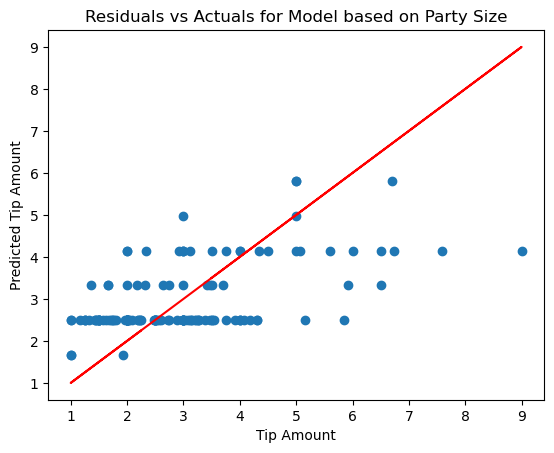

In [119]:
    #0. Plot actuals vs predicted

plt.scatter(y, lr1.predict(X_train_rfe))
plt.title('Residuals vs Actuals for Model based on Party Size')
plt.plot(y,y, ls='-', c='r')
plt.xlabel('Tip Amount')
plt.ylabel('Predicted Tip Amount')
plt.show()

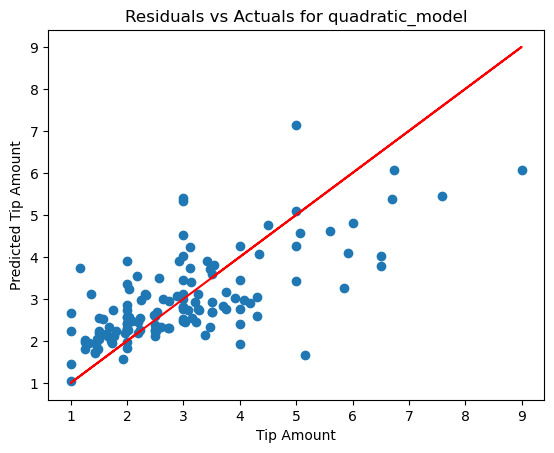

In [120]:
plt.scatter(y, plyreg.predict(x_train_sq))
plt.title('Residuals vs Actuals for quadratic_model')
plt.plot(y,y, ls='-', c='r')
plt.xlabel('Tip Amount')
plt.ylabel('Predicted Tip Amount')
plt.show()


In [ ]:
    #p. Plotting the residuals

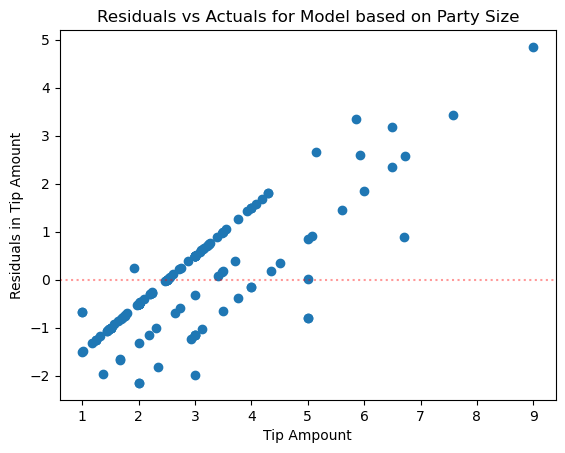

In [121]:
plt.scatter(y, y - lr1.predict(X_train_rfe))
plt.title('Residuals vs Actuals for Model based on Party Size')
plt.axhline(0, ls=':', c='r', alpha=0.4)
plt.xlabel('Tip Ampount')
plt.ylabel('Residuals in Tip Amount')
plt.show()

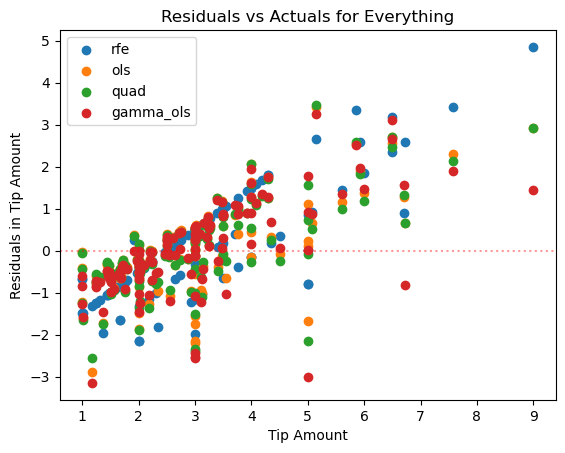

In [122]:
plt.scatter(y, y - lr1.predict(X_train_rfe), label='rfe')
plt.scatter(y, y - lr2.predict(X), label='ols')
plt.scatter(y, y - plyreg.predict(x_train_sq), label='quad')
plt.scatter(y, y - gams.predict(X), label='gamma_ols')
plt.title('Residuals vs Actuals for Everything')
plt.axhline(0, ls=':', c='r', alpha=0.4)
plt.xlabel('Tip Amount')
plt.ylabel('Residuals in Tip Amount')
plt.legend()
plt.show()

In [ ]:
    #q. Histogram of actual and predicted values

Text(0.5, 1.0, 'Distributions of Predicted Values vs Real Target')

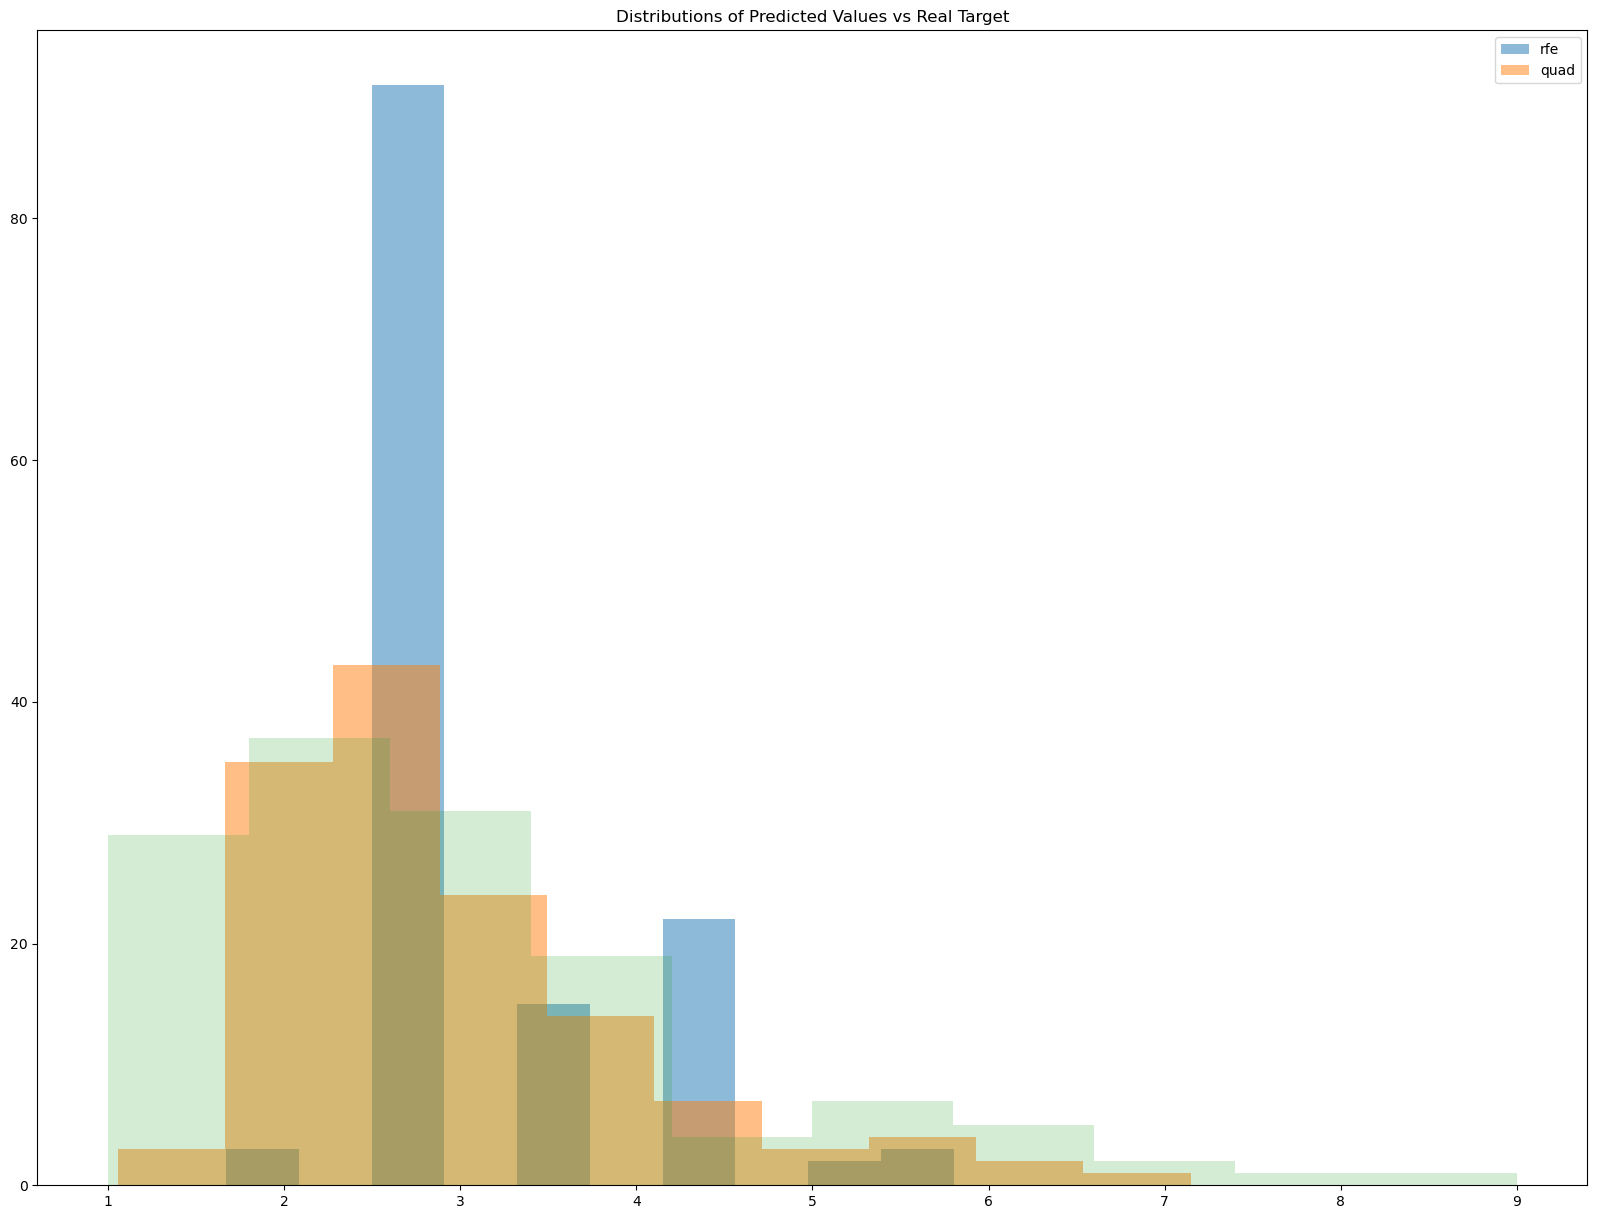

In [123]:
plt.figure(figsize=(20,15))
plt.hist(lr1.predict(X_train_rfe), alpha=0.5, label='rfe')
# plt.hist(lr2.predict(X), alpha=0.5, label='ols')
plt.hist(plyreg.predict(x_train_sq), alpha=0.5, label='quad')
# plt.hist(gams.predict(X), alpha=0.5, label='gamma_ols')
plt.hist(y, alpha=0.2)
plt.legend()
plt.title('Distributions of Predicted Values vs Real Target')